# 1- IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# 2- LOADING THE DATA

In [2]:
df = pd.read_csv(r"C:\Users\HomePC\Downloads\data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace = True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# 3- RANDOM FOREST MODELLING

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
##Seperate the target variable from the independent variables
y = df['churn']
X = df.drop(columns = ['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [9]:
# Add model training in here!
model = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 10)

# Add parameters to the model!
model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=8, min_samples_split=10)

In [11]:
## To check which independent variable is more important

model.feature_importances_

array([0.03457143, 0.009269  , 0.02911901, 0.03097898, 0.00143703,
       0.03696975, 0.02518475, 0.01310357, 0.00526249, 0.00296293,
       0.02098648, 0.06734406, 0.07232222, 0.00622102, 0.03977727,
       0.02765383, 0.02508269, 0.01290476, 0.00723346, 0.01158694,
       0.00624753, 0.00651411, 0.0221235 , 0.01177969, 0.0119745 ,
       0.01712285, 0.00701474, 0.00779247, 0.00825948, 0.00263403,
       0.00246634, 0.01593905, 0.00920961, 0.00632786, 0.0267352 ,
       0.00835344, 0.02526491, 0.01246086, 0.02957244, 0.01680424,
       0.00818777, 0.01772733, 0.01448414, 0.00931801, 0.01765471,
       0.00865975, 0.001255  , 0.00518139, 0.02179597, 0.03830012,
       0.01960457, 0.0277565 , 0.02240263, 0.00241352, 0.00112247,
       0.00941631, 0.00196242, 0.00260545, 0.0125872 , 0.00201094,
       0.02098523])

In [13]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'var_year_price_off_peak_var',
       'var_year_price_peak_var', 'var_year_price_mid_peak_var',
       'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
       'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
       'var_year_price_peak', 'var_year_price_mid_peak',
       'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
       'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
       'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
       'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak',
       'churn', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_j

# 4-To generate the prediction



In [50]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[3286,    0],
       [ 364,    2]], dtype=int64)

In [ ]:
## To check the accuracy of the model

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

0.9003285870755751

In [28]:
## CROSS VALIDATION OF THE MODEL

from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(model, X_train, y_train, cv=5)

array([0.90369694, 0.90369694, 0.90369694, 0.90415335, 0.90410959])

In [30]:
## Classification report of the model

In [35]:
from sklearn.metrics  import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3650
           1       0.01      1.00      0.01         2

    accuracy                           0.90      3652
   macro avg       0.50      0.95      0.48      3652
weighted avg       1.00      0.90      0.95      3652



# 5- Ploting the features importance

<function matplotlib.pyplot.show(close=None, block=None)>

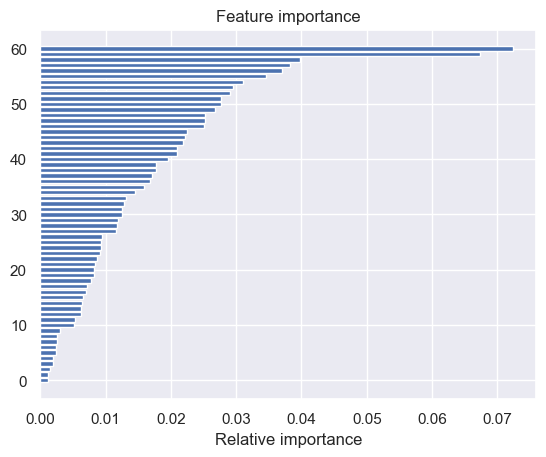

In [41]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importance')
plt.barh(range(len(indices)), importances[indices], color='b')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show

# CONCLUSION

We can concludely say the model fitted is highly accurate as it has 90% accuracy,which means the model is good in prdicting the churn rate.
The data that mostly predict the churn is the forecast_cons_12m' as it has the maximum feature importance.